Versions used : 

Library  | Version
-------------------|------------------
matplotlib | 3.6.2
pandas  | 1.3.5
seaborn | 0.11.2
nltk | 3.7

In [ ]:
pip install --upgrade matplotlib

In [1]:
import matplotlib
print(matplotlib.__version__)

3.6.2


In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
import os
os.chdir('MyDrive/Projects')
!ls

'Sentiment Analysis Dataset 2.csv'


In [ ]:
import nltk 
nltk.download('popular')
nltk.download('stopwords')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import string
file_path='Sentiment Analysis Dataset 2.csv'
df=pd.read_csv(file_path,on_bad_lines='skip')

In [6]:
print(df.shape)
df.head()

(1578612, 4)


,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


In [7]:
#dropping unneccessary columns
df.drop(['SentimentSource','ItemID'],axis=1,inplace=True)

In [8]:
#Checking for null values (returns Boolean Value)
df.isnull().any()

Sentiment        False
SentimentText    False
dtype: bool

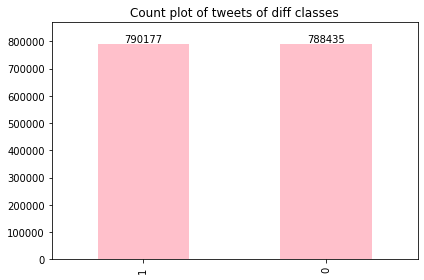

In [28]:
#We have nearly equal number of SentimentTexts that are of depressed and non-depressed nature
ax=df['Sentiment'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))
ax.bar_label(ax.containers[-1])
# ax.bar_label('aaa','bbb')
ax.margins(y=0.1)
plt.title('Count plot of tweets of diff classes')
plt.tight_layout()
plt.show()

In [ ]:
#To remove spaces, may not be necessary
# df['SentimentText']=df['SentimentText'].str.replace(" ",'')

In [10]:
#Converting all SentimentTexts to lower case
df['SentimentText']=df['SentimentText'].str.lower()

#Removing Punctuation
df['SentimentText']=df['SentimentText'].str.translate(str.maketrans('', '', string.punctuation))

#Removing URL's
df['SentimentText'] = df['SentimentText'].str.replace('http\S+|www.\S+', '', case=False)

In [11]:
#Adding length column in dataframe
df['length']=df["SentimentText"].str.len()

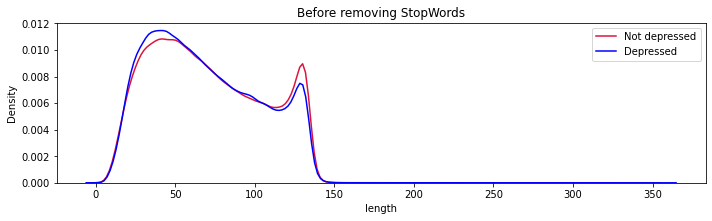

In [12]:
fig, ax = plt.subplots(figsize=(10, 3))
transparency=0.6
sns.kdeplot(df.loc[(df['Sentiment']==0), 
            'length'],
            color='crimson', label='Not depressed', ax=ax)

sns.kdeplot(df.loc[(df['Sentiment']==1), 
            'length'],
            color='blue', label='Depressed', ax=ax)
ax.legend()
plt.tight_layout()
plt.title('Before removing StopWords')
plt.show()

In [13]:
#Removing StopWords
stop_words = stopwords.words('english')
df['WithoutStopwords'] = df['SentimentText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['len after']=df["WithoutStopwords"].str.len()

In [14]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Sentiment,length,len after
count,1578612.0,1578612.0,1578612.0
mean,0.5,69.7,49.2
std,0.5,34.4,24.8
min,0.0,1.0,0.0
25%,0.0,41.0,29.0
50%,1.0,65.0,46.0
75%,1.0,97.0,68.0
max,1.0,358.0,357.0


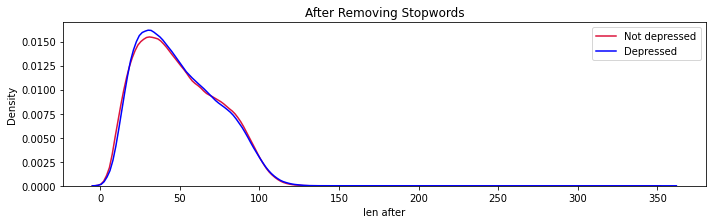

In [15]:
fig, ax = plt.subplots(figsize=(10, 3))
transparency=0.6
sns.kdeplot(df.loc[(df['Sentiment']==0), 
            'len after'],
            color='crimson', label='Not depressed', ax=ax)

sns.kdeplot(df.loc[(df['Sentiment']==1), 
            'len after'],
            color='blue', label='Depressed', ax=ax)
ax.legend()
plt.tight_layout()
plt.title('After Removing Stopwords')
plt.show()

<h3>Visualization with Word Clouds </h3>

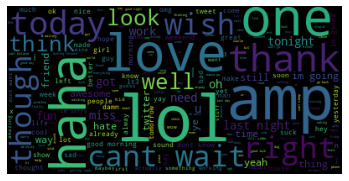

In [33]:
complete_wordcloud = WordCloud().generate(' '.join(df['WithoutStopwords']))
plt.imshow(complete_wordcloud)
plt.axis("off")
plt.show()

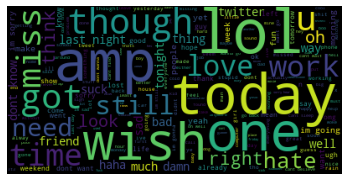

In [34]:
#With 0 sentiment
#Not depressed tweets
words = ' '.join([Text for Text in df[df['Sentiment']==0]['WithoutStopwords']])
wordcloud1 = WordCloud().generate(words)
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

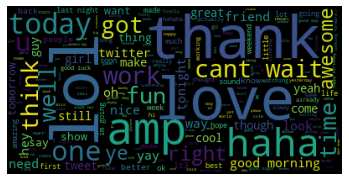

In [36]:
#With 0 sentiment
#Depressed tweets
dep_words = ' '.join([Text for Text in df[df['Sentiment']==1]['WithoutStopwords']])
wordcloud2 = WordCloud().generate(dep_words)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [16]:
#Grouping dataframe based on Sentiment, and getting max length of each class, using a lambda function
Grouped_senti = (df.groupby('Sentiment')['WithoutStopwords']
       .agg(lambda x: x.str.len().max())
       .reset_index(name='Max_length'))
Grouped_senti.head()

,Sentiment,Max_length
0,0,347
1,1,357


In [17]:
#Longest Tweet that is labelled "Not-depressed"
df.loc[(df['Sentiment']==0) & (df['len after']==Grouped_senti['Max_length'][0])]

,Sentiment,SentimentText,length,WithoutStopwords,len after
396369,0,neospace à¹€à¸£à¸·à¹ˆà¸­à¸‡à¸•à¸±à¹‰à¸‡à¸žà¸£à...,348,neospace à¹€à¸£à¸·à¹ˆà¸­à¸‡à¸•à¸±à¹‰à¸‡à¸žà¸£à...,347


In [18]:
#Longest Tweet that is labelled "Depressed"
df.loc[(df['Sentiment']==1) & (df['len after']==Grouped_senti['Max_length'][1])]

,Sentiment,SentimentText,length,WithoutStopwords,len after
195444,1,iannnnn à¹€à¸”à¸µà¹‹à¸¢à¸§à¸­à¸µà¸à¸‹à¸±à¸à¸„à...,358,iannnnn à¹€à¸”à¸µà¹‹à¸¢à¸§à¸­à¸µà¸à¸‹à¸±à¸à¸„à...,357


<h3>Performing Stemming</h3>

In [ ]:
#stemming

<h3>Performing Lemmatization</h3>
<ul>
<li>It is context dependent.
<li>Canonical dictionary-based approach.
<li>Higher accuracy.
<li>.Used when context of words is important.
<li>Slower process. </ul>